In [1]:
library(pheatmap)
library(RColorBrewer)
library(Polychrome)
library(cluster)
library(dplyr)
library(phytools)
library(ggtree)

Warning message:
“package ‘cluster’ was built under R version 4.3.2”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘phytools’ was built under R version 4.3.2”
Loading required package: ape

Warning message:
“package ‘ape’ was built under R version 4.3.3”

Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


Loading required package: maps

Warning message:
“package ‘maps’ was built under R version 4.3.2”

Attaching package: ‘maps’


The following object is masked from ‘package:cluster’:

    votes.repub


Warning message:
“package ‘ggtree’ was built under R version 4.3.2”
ggtree v3.10.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite


# Purpose:

This notebook generates additional figures that require an R environment to be generated. This uses a different environment than the other notebook so please activate that environment following instructions in README.

# Figure 2

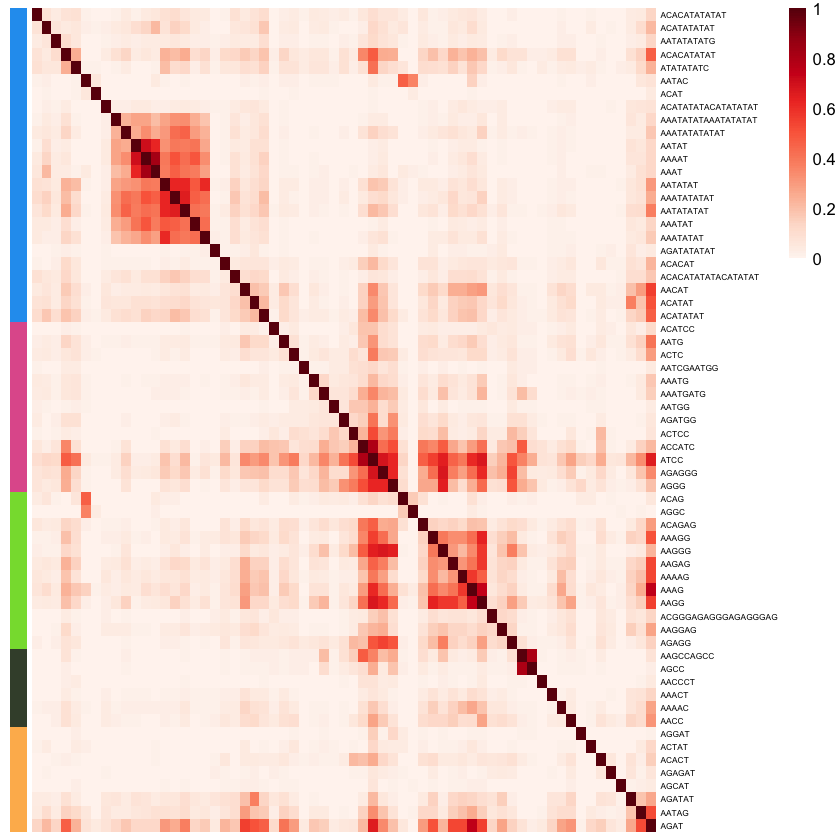

In [2]:
set.seed(42)
r2.df <- read.csv('fig_data/2023_05_18_kmer.r2.leiden.csv', row.names = 1)

leiden.clust <- read.csv('fig_data/kmer.mutation.leiden.r2.clusters.csv')

members <- leiden.clust$label
names(members) <- leiden.clust$tandems

lv_clusters <- c()
for (j in 0:max(members)){
  
  if (sum(members == j ) > 1) {
    lv_clusters <-c(lv_clusters, members[members == j])
  }
  
}
kmers <- names(lv_clusters)
lv_clusters <- paste0("Community_",lv_clusters+1)

names(lv_clusters) <- kmers
colormap <- createPalette(nlevels(as.factor(lv_clusters)), c("#2A95E8", "#E5629C"), range = c(20, 80), M = 300)

names(colormap ) <- unique(lv_clusters)
louvain_anno <- list(Communities=colormap)
cluster_anno <- data.frame(Communities=lv_clusters)

#this re-orders cells by distance using hierarchical clustering WITHIN each cluster only
re_ordered_clust <- c()
for (clust in unique(lv_clusters)){
  c_set <- names(lv_clusters[lv_clusters == clust])
  
  D = as.dist(1-r2.df[c_set, c_set])
  
  H = hclust(D)
  re_ordered_clust <- c(re_ordered_clust, c_set[H$order])
}

R2 <- r2.df[re_ordered_clust,re_ordered_clust]

breaksList = seq(0, 1, by = 0.01)
tandem_clustering <- pheatmap(mat = R2, clustering_distance_rows = F, clustering_distance_cols =  F, clustering_method = "average", show_rownames = T, fontsize_row = 5, show_colnames = F, cluster_rows = F, cluster_cols = F, breaks=breaksList, border_color = NA, annotation_row = cluster_anno, annotation_colors = louvain_anno, annotation_legend = F, color = colorRampPalette((brewer.pal(n = 9, name = "Reds")))(length(breaksList)), treeheight_row = 0, treeheight_col = 0, annotation_names_row = F)

One important visual improvement for the above plot is that within each community we use hierarchical clustering to seriate within a community. This does not change the results, but emphasizes the similarity wihtin the community.

Below for the OR plot we use the same ordering of the cells as the above plot. That way we can directly compare.

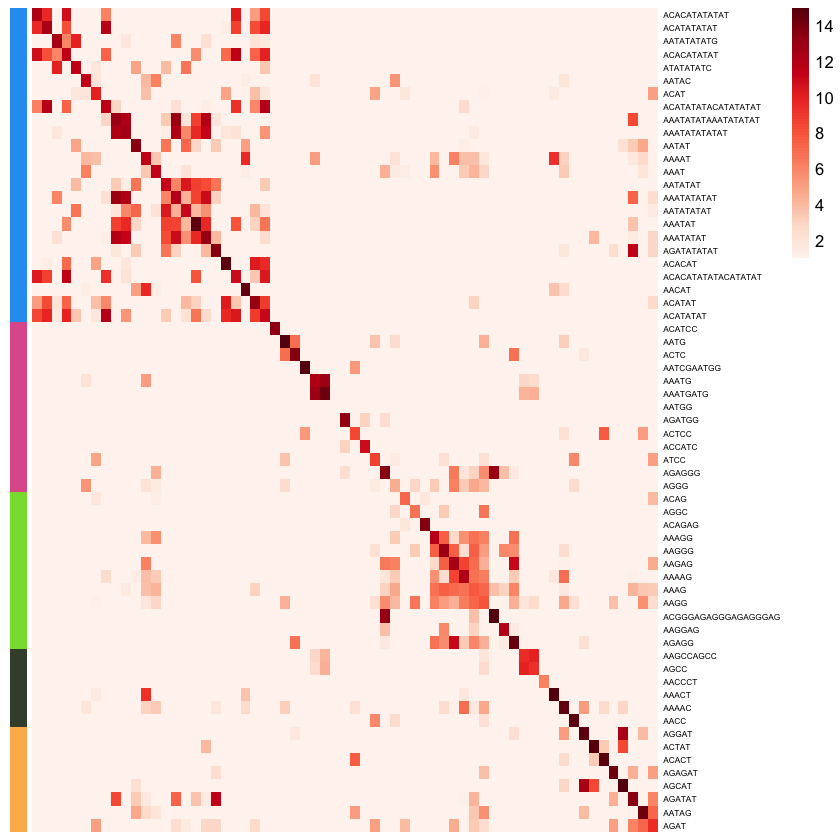

In [4]:
set.seed(42)
tandem_independence <- read.csv("fig_data/2023_05_18.interspersion.OR.csv", row.names = 1)


leiden.clust <- read.csv('fig_data/kmer.mutation.leiden.r2.clusters.csv')

members <- leiden.clust$label
names(members) <- leiden.clust$tandems

lv_clusters <- c()
for (j in 0:max(members)){
  
  if (sum(members == j ) > 1) {
    lv_clusters <-c(lv_clusters, members[members == j])
  }
  
}
kmers <- names(lv_clusters)
lv_clusters <- paste0("Community_",lv_clusters+1)

names(lv_clusters) <- kmers
colormap <- createPalette(nlevels(as.factor(lv_clusters)), c("#2A95E8", "#E5629C"), range = c(20, 80), M = 300)

names(colormap ) <- unique(lv_clusters)
louvain_anno <- list(Communities=colormap)
cluster_anno <- data.frame(Communities=lv_clusters)

re_ordered_clust <- c()
for (clust in unique(lv_clusters)){
  c_set <- names(lv_clusters[lv_clusters == clust])
  
  D = as.dist(1-r2.df[c_set, c_set])
  
  H = hclust(D)
  re_ordered_clust <- c(re_ordered_clust, c_set[H$order])
}

logodds <- log2(tandem_independence[re_ordered_clust, re_ordered_clust]+1)

breaksList = seq(1, 15, by = 0.15)
tandem_clustering <- pheatmap(mat = logodds, clustering_distance_rows = F, clustering_distance_cols =  F, clustering_method = "average", show_rownames = T, fontsize_row = 5, show_colnames = F, cluster_rows = F, cluster_cols = F, breaks=breaksList, border_color = NA, annotation_row = cluster_anno, annotation_colors = louvain_anno, annotation_legend = F, color = colorRampPalette((brewer.pal(n = 9, name = "Reds")))(length(breaksList)), treeheight_row = 0, treeheight_col = 0, annotation_names_row = F)

# Figure 4

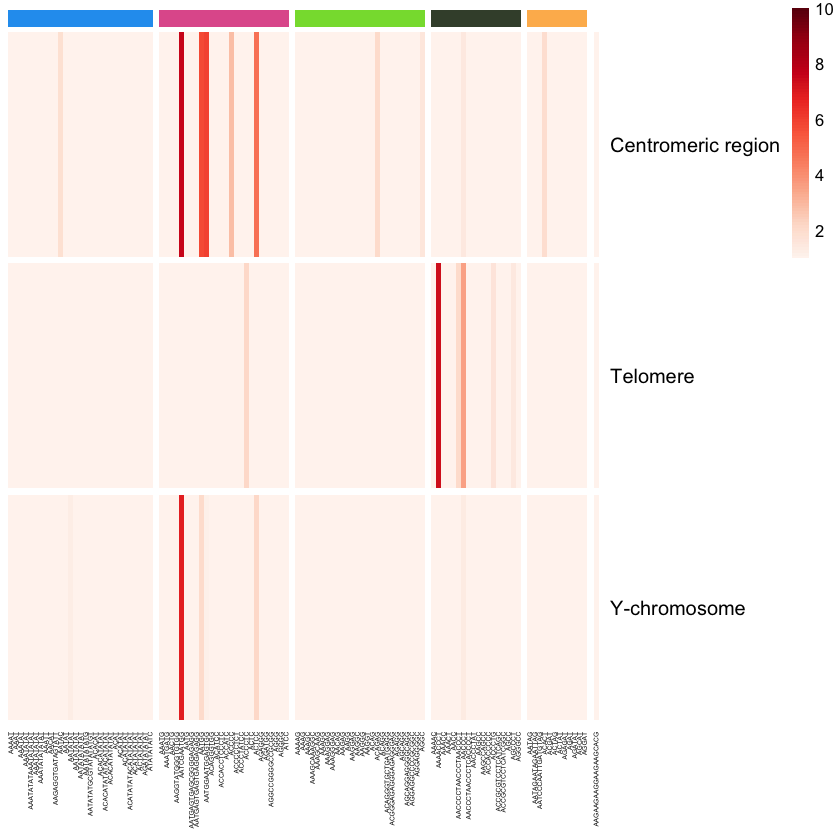

In [21]:
mcl <- read.csv('fig_data/kmer.mutation.clusters.leiden.csv', row.names = 1)

kmer_annot <- read.csv("fig_data/2023_05_05.annot_enrichment_table.csv", row.names = 1)
colnames(kmer_annot) <- c("Centromeric region", "Pericentromere", "Subtelomere", "Telomere",  "Y-chromosome")# defunct labels
set.seed(42)

kmer_annot <- kmer_annot[c("Centromeric region", "Telomere", "Y-chromosome")]
members <- mcl$label
names(members) <- mcl$tandems

lv_clusters <- c()
null_clusters <- c()
for (j in 0:max(members)){
  
  if (sum(members == j ) > 1) {
    lv_clusters <-c(lv_clusters, members[members == j])
  } else{
    lb <- c("-1")
    names(lb) <- names(members[members == j])
    null_clusters <- c(null_clusters, lb)
    
  }
  
}


lv_clusters <- c(lv_clusters, null_clusters)

kmers <- names(lv_clusters)
lv_clusters <- paste0("Cluster_",lv_clusters)

names(lv_clusters) <- kmers
colormap <- createPalette(nlevels(as.factor(lv_clusters))-1, c("#2A95E8", "#E5629C"), range = c(20, 80), M = 300)

#add last for singleton clusters
colormap <- c(colormap, "white")

names(colormap ) <- unique(lv_clusters)
louvain_anno <- list(Communities=colormap)
cluster_anno <- data.frame(Communities=lv_clusters)


breaksList = seq(1,10, by = .1)

annot_table <- log2( t(kmer_annot[names(lv_clusters),])+1)

tandem_clustering <- pheatmap(mat = annot_table, clustering_distance_rows = F, clustering_distance_cols =  F, clustering_method = "average", show_rownames = T, fontsize_row = 12, fontsize_col =  4, show_colnames = T, cluster_rows = F, cluster_cols = F, border_color = NA, annotation_col = cluster_anno, breaks = breaksList, annotation_colors = louvain_anno, display_numbers = F, number_format = "%.2f", number_color = "black", fontsize_number = 10, color = colorRampPalette((brewer.pal(n = 9, name = "Reds")))(length(breaksList)), treeheight_row = 0, treeheight_col = 0, annotation_legend=F, annotation_names_col = F, angle_col = 90, gaps_row = c(1,2,3), gaps_col = c(29, 55, 81, 99, 111, 112))
ggsave("Fig4.png", tandem_clustering, dpi=300, w=8, h=2.5)

# Figure 6

This function will not run as is when called because the CSV files it requires are too large for github. The cenGRM csvs are in Supplemental File 4. You will need to change this path for it to work. Otherwise the function will work fine. 

In [10]:
genHierachPlot <- function(chrom, save_p=F, censat_annots=c(), qtile=100, silent=T){
  
    #change the path for this file
  grm_D <- read.csv(paste0('fig_data/',chrom,'.grm.disimilarity.csv'), row.names = 1) #this is not read-able immediately
    #github prevents me from uploading large files >50Mb therefore I cannot directly upload this, but it is
    #in the Supplemental Files
  
  k_df <- read.csv('fig_data/Supplemental_Table_1.csv', row.names = 1)
  metadata <- read.csv("fig_data/2023_03_22.1KGP.metadata.csv", row.names = 1)
  #colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu")))
 
  
  censats <- c("AATCGAATGG.CCATTCGATT", "AATGG.CCATT", 'AATGGAATGGAGTGG.CCACTCCATTCCATT', 'ACTCC.GGAGT')
  
  censat_df <- k_df[censats]
  colnames(censat_df) <- c("AATCGAATGG", "AATGG", 'AATGGAATGGAGTGG', 'ACTCC')
  censat_df <- censat_df[row.names(grm_D),]
  
  color_pal <- c('#f77189', '#ae9d31', '#33b07a', '#38a9c5', '#cc7af4')
  POPS<- color_pal
  names(POPS) <- c("AMR", "EUR", "AFR", "SAS", "EAS")
  sat_color <- viridis(qtile)
  names(sat_color) <- seq(1:qtile)
  
  anno_colors <- list(Population= POPS, AATCGAATGG=sat_color, AATGG=sat_color, AATGGAATGGAGTGG=sat_color, ACTCC=sat_color)
  
  annotations <- matrix(data = metadata[row.names(grm_D),]$superpop, nrow = 2504, ncol = 1)
  rownames(annotations) <- row.names(grm_D)
  colnames(annotations) <- c('Population')
  annotations <- as.data.frame(annotations)
  for (cen_ann in censat_annots){
  
    annotations[,as.character(cen_ann)] <- ntile(censat_df[,colnames(censat_df) == cen_ann], qtile)
  }
  #annotations$AATCGAATGG <- ntile(censat_df$AATCGAATGG, 10)
  #annotations$AATGGAATGGAGTGG <- ntile(censat_df$AATGGAATGGAGTGG, 10)
  #annotations$ACTCC <- ntile(censat_df$ACTCC, 10)

  #grm_dist <- as.dist(grm_D)
  
  #harch_CN <- pheatmap(mat=t(censat_df), cluster_rows = F, cluster_cols = T, clustering_distance_cols = as.dist(grm_D), clustering_distance_rows = as.dist(grm_D), show_rownames = F, show_colnames = F, annotation_col  = annotations, annotation_colors = anno_colors, gaps_row = c(1,2,3,4),  clustering_method = "average", color = colorRampPalette(rev(brewer.pal(n = 9, name = "Spectral"))) (100),  silent = F, cellheight = NA, cellwidth = NA, border_color = F, scale='rows')

breaksList = seq(-1,1, by = .01)
harch <- pheatmap(mat=1-grm_D, cluster_rows = T, cluster_cols = T,
                  clustering_distance_cols = as.dist(grm_D), clustering_distance_rows = as.dist(grm_D), 
                  show_rownames = F, show_colnames = F, annotation_col  = annotations, 
                  annotation_colors = anno_colors,  clustering_method = "average", 
                  color = colorRampPalette(rev(brewer.pal(n = 9, name = "Spectral"))) (length(breaksList)),  
                  silent = silent, cellheight = NA, cellwidth = NA, border_color = F, breaks = breaksList)
  
  #colorRampPalette(rev(brewer.pal(n = 9, name = "Spectral"))) (100)
    #pheatmap(mat=grm_D, cluster_rows = T, cluster_cols = T, clustering_distance_rows = as.dist(grm_D), clustering_distance_cols = as.dist(grm_D), show_rownames = F, show_colnames = F, annotation_col = annotations, annotation_names_col = FALSE, annotation_colors = anno_colors,  clustering_method = "average", color = colorRampPalette(rev(brewer.pal(n = 9, name = "RdBu"))) (100), scale = "none", silent = F)
  #return(harch)
if (save_p == T){
  ggsave(paste0(chrom,".censat.heatmap.dendro.png"), harch, dpi=300, height = 5.5, width = 8, device = 'png')
}
else { return(harch)}
                    }

In [ ]:
harch <- genHierachPlot('chr16', save_p = T, censat_annots = c("AATCGAATGG"), qtile = 100)

In [ ]:
harch <- genHierachPlot('chr9', save_p = F, censat_annots = c("AATGG"), qtile = 100)
